In [1]:
# install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 101.1 MB/s eta 0:0

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [3]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
crab_age_path = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments2/CrabAgePrediction.csv'

Mounted at /content/gdrive


In [4]:
# read data
import pandas as pd
crab_age_regression = pd.read_csv(crab_age_path)

# check data
crab_age_regression.shape

(3893, 9)

In [5]:
crab_age_regression.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [6]:
crab_age_regression.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [7]:
crab_age_regression.describe

<bound method NDFrame.describe of      Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0      F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1      M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2      I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3      F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4      I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   
...   ..     ...       ...     ...        ...             ...             ...   
3888   F  1.4625    1.1375  0.3250  24.819987       11.651644        5.854172   
3889   F  1.5500    1.2125  0.4375  34.458817       15.450477        7.172423   
3890   I  0.6250    0.4625  0.1625   2.012815        0.765436        0.524466   
3891   I  1.0625    0.7750  0.2625  10.347568        4.507570        2.338834   
3892   I  0.7875    0.6125  0.2125   4.068153        1.502523        1.3466

In [8]:
# create train data
data_train = crab_age_regression.sample(frac=0.9)
data_train.shape

(3504, 9)

In [9]:
data_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2996,M,1.5375,1.2750,0.3750,36.740952,15.450477,9.397859,9.071840,9
3828,I,1.2375,0.9500,0.3375,14.444070,5.854172,3.302717,4.677668,8
704,I,1.0125,0.6250,0.2250,8.150481,3.628736,1.786018,2.282135,7
3102,M,1.7000,1.3000,0.4125,41.886386,20.525038,7.909510,11.509897,11
3706,F,1.4750,1.1625,0.4250,29.554354,13.139993,6.803880,7.654365,10


In [10]:
data_test = crab_age_regression.drop(data_train.index)
data_test.shape

(389, 9)

In [11]:
data_test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
11,F,1.3625,1.0500,0.4375,21.375523,7.257472,5.032036,7.796112,10
13,I,1.3750,1.0750,0.3625,20.184844,8.575724,4.309124,6.378637,10
26,M,1.3375,1.0750,0.3500,20.312417,8.093782,4.521745,6.109317,8


In [12]:
data_train.reset_index(drop=True, inplace=True)
data_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.5375,1.2750,0.3750,36.740952,15.450477,9.397859,9.071840,9
1,I,1.2375,0.9500,0.3375,14.444070,5.854172,3.302717,4.677668,8
2,I,1.0125,0.6250,0.2250,8.150481,3.628736,1.786018,2.282135,7
3,M,1.7000,1.3000,0.4125,41.886386,20.525038,7.909510,11.509897,11
4,F,1.4750,1.1625,0.4250,29.554354,13.139993,6.803880,7.654365,10


In [13]:
data_test.reset_index(drop=True, inplace=True)
data_test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
1,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
2,F,1.3625,1.0500,0.4375,21.375523,7.257472,5.032036,7.796112,10
3,I,1.3750,1.0750,0.3625,20.184844,8.575724,4.309124,6.378637,10
4,M,1.3375,1.0750,0.3500,20.312417,8.093782,4.521745,6.109317,8


In [14]:
# import pycaret classification
from pycaret.regression import *
reg = setup(data=data_train, target = 'Age')

,Description,Value
0,Session id,6900
1,Target,Age
2,Target type,Regression
3,Original data shape,"(3504, 9)"
4,Transformed data shape,"(3504, 11)"
5,Transformed train set shape,"(2452, 11)"
6,Transformed test set shape,"(1052, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [15]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5522,4.9217,2.2115,0.5369,0.1763,0.1530,0.3730
rf,Random Forest Regressor,1.5802,4.9363,2.2161,0.5349,0.1779,0.1561,1.1190
lightgbm,Light Gradient Boosting Machine,1.5859,5.0327,2.2362,0.5272,0.1788,0.1557,0.2420
et,Extra Trees Regressor,1.5863,5.0301,2.2377,0.5254,0.1802,0.1570,0.6610
ridge,Ridge Regression,1.5967,5.0654,2.2442,0.5228,0.1826,0.1598,0.0640
br,Bayesian Ridge,1.5991,5.1131,2.2542,0.5181,0.1831,0.1602,0.1220
huber,Huber Regressor,1.5596,5.1495,2.2620,0.5159,0.1803,0.1498,0.1410
lr,Linear Regression,1.5987,5.1647,2.2641,0.5128,0.1830,0.1600,0.8640
knn,K Neighbors Regressor,1.6242,5.3522,2.3057,0.4944,0.1848,0.1585,0.0680
xgboost,Extreme Gradient Boosting,1.6808,5.6464,2.3675,0.4688,0.1894,0.1650,0.6410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [16]:
gbr_regressor = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4605,4.5767,2.1393,0.5355,0.1766,0.1488
1,1.5646,4.8132,2.1939,0.6183,0.1786,0.1590
2,1.4000,3.4985,1.8704,0.5715,0.1635,0.1447
3,1.3881,4.3427,2.0839,0.5626,0.1624,0.1382
4,1.6864,5.6121,2.3690,0.5187,0.1856,0.1651
5,1.5367,4.8105,2.1933,0.5667,0.1763,0.1543
6,1.6827,5.8169,2.4118,0.4574,0.1838,0.1597
7,1.5307,4.7426,2.1778,0.4576,0.1732,0.1475
8,1.7212,6.3909,2.5280,0.5121,0.1864,0.1560


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
print(gbr_regressor)

GradientBoostingRegressor(random_state=6900)


In [18]:
tuned_gbr_regressor = tune_model(gbr_regressor)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5067,4.8992,2.2134,0.5028,0.1808,0.1531
1,1.5880,5.0439,2.2459,0.6000,0.1782,0.1572
2,1.3927,3.4163,1.8483,0.5815,0.1646,0.1442
3,1.4058,4.6123,2.1476,0.5355,0.1674,0.1398
4,1.7390,5.9776,2.4449,0.4874,0.1901,0.1692
5,1.5613,4.9630,2.2278,0.5530,0.1808,0.1576
6,1.7028,5.9295,2.4351,0.4469,0.1873,0.1626
7,1.6437,4.9893,2.2337,0.4293,0.1792,0.1574
8,1.7103,6.2846,2.5069,0.5202,0.1890,0.1575


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


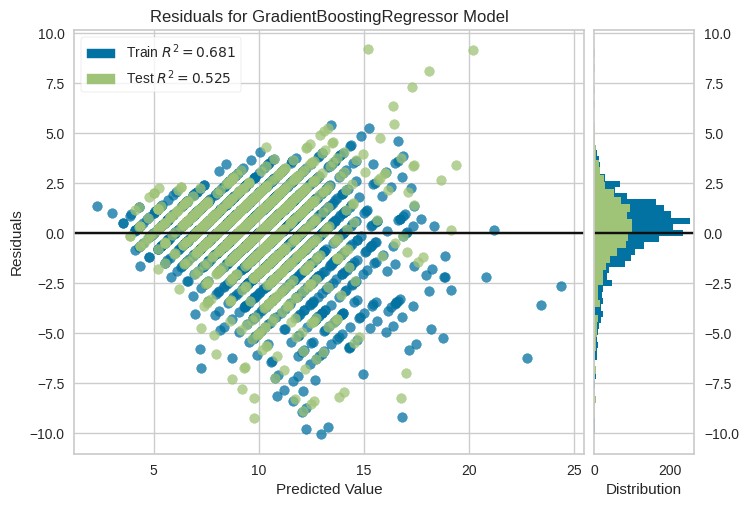

In [19]:
plot_model(gbr_regressor)

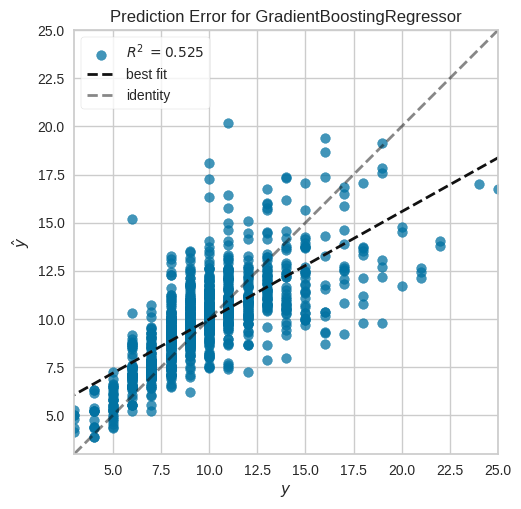

In [20]:
plot_model(tuned_gbr_regressor, plot="error")

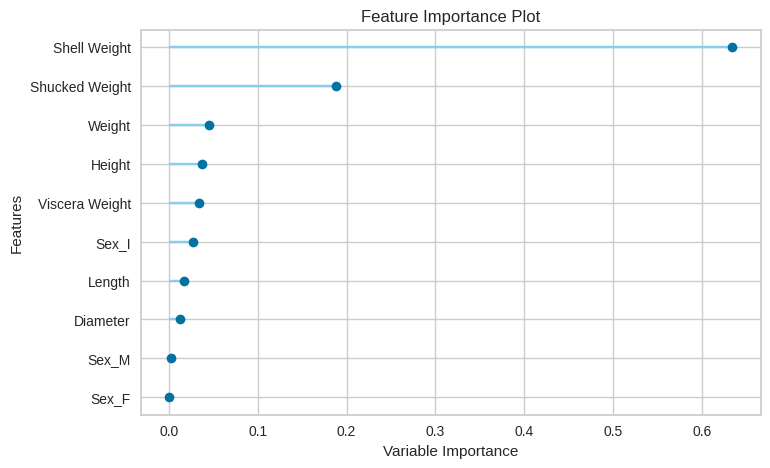

In [21]:
plot_model(tuned_gbr_regressor, plot="feature")

In [22]:
# save pipeline
final_gbr = finalize_model(tuned_gbr_regressor)
test_prediction = predict_model(final_gbr, data=data_test)
test_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.5536,4.7564,2.1809,0.5400,0.1808,0.1571


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,prediction_label
0,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,6.755881
1,I,1.5875,1.2500,0.4125,42.212406,20.269892,9.766403,10.248344,13,10.984990
2,F,1.3625,1.0500,0.4375,21.375523,7.257472,5.032036,7.796113,10,13.192179
3,I,1.3750,1.0750,0.3625,20.184843,8.575724,4.309124,6.378637,10,9.847803
4,M,1.3375,1.0750,0.3500,20.312416,8.093782,4.521745,6.109317,8,10.436582


In [23]:
save_model(tuned_gbr_regressor, "my_regression_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Weight', 'Shucked Weight',
                                              'Viscera Weight', 'Shell Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('clean_column_names',
                  TransformerWrapper(transforme

In [28]:
# gradio app
!pip install gradio
!pip install pycaret[mlops]

In [29]:
dt = create_model('gbr_regressor')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0163,9.2683,3.0444,0.0593,0.2428,0.1988
1,2.3293,12.1992,3.4927,0.0327,0.2659,0.2296
2,2.0122,8.8286,2.9713,-0.0814,0.2390,0.2042
3,1.9143,8.4041,2.8990,0.1536,0.2286,0.1882
4,2.3224,11.3020,3.3619,0.0307,0.2597,0.2248
5,2.0571,8.6939,2.9485,0.2169,0.2414,0.2094
6,2.1469,9.7551,3.1233,0.0901,0.2473,0.2074
7,2.0939,10.1184,3.1809,-0.1573,0.2425,0.2027
8,2.2939,11.2898,3.3600,0.1381,0.2513,0.2138


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
create_app(gbr_regressor)

ModuleNotFoundError: ignored